Librerias

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#Ejercicio 3

## Factorizacion LU

In [50]:
def lu_factorization(A, tol=1e-15):
    m, n = np.shape(A)
    if m != n:
      raise ValueError("La matriz A no es cuadrada.")
    n = len(A[0])
    L = np.zeros((n, n))
    U = np.copy(A)
    for k in range(n-1):
      if abs(U[k, k]) > tol and U[k, k] != 0:
        for i in range(k+1, n):
          L[i, k] = U[i, k] / U[k, k]
          U[i] = U[i] - L[i, k] * U[k]
      else:
        raise ValueError("La matriz A no es invertible.")
    L = L + np.eye(n)
    return L, U

## Factorizacion PLU

In [67]:
def plu_factorization(A, tol=1e-15):

    m, n = np.shape(A)
    if m != n:
        return None

    n = len(A[0])
    L = np.zeros((n, n))
    U = np.copy(A)
    P=np.eye(n)

    for j in range(n-1):
        maxr = ren_maximo(U[:,j], j)
        if abs(U[maxr, j]) < tol or U[maxr, j] == 0:
          return print('valor mayor es cercano a 0')
        L = cambio_col(L, j, maxr)
        U = cambio_col(U, j, maxr)
        P = cambio_col(P, j, maxr)
        for i in range(j+1, n):
          L[i, j] = U[i, j] / U[j, j]
          U[i] = U[i] - L[i, j] * U[j]

    L = L + np.eye(n)
    return L, U, P

def ren_maximo(v,j):
    maxv = v[j]
    maxr = j
    for i in range(j, len(v)):
        if abs(v[i]) > maxv:
            maxv = abs(v[i])
            maxr = i
    return maxr

def cambio_col(A, i, j):
    B = np.copy(A)
    A[i] = B[j]
    A[j] = B[i]
    return A

## Factorizacion Cholesky

In [54]:
def is_symmetric(A):
    return np.allclose(A, A.T)

In [55]:
def cholesky_factorization(A, tol = 1e-15):
    m, n = np.shape(A)
    if m != n:
            raise ValueError("La matriz A no es cuadrada.")
    if not is_symmetric(A):
            raise ValueError("La matriz A no es simétrica.")
    n = A.shape[0]
    U = np.copy(A)
    for k in range(n):
      for i in range(k+1, n):
        U[i] = U[i] - U[k] * U[i, k] / U[k, k]
      U[k] = U[k] / np.sqrt(U[k, k])
      if U[k, k] <= tol or U[k, k] == 0:
          raise ValueError("La matriz A no es definida positiva.")
    return U

# Ejercicio 4

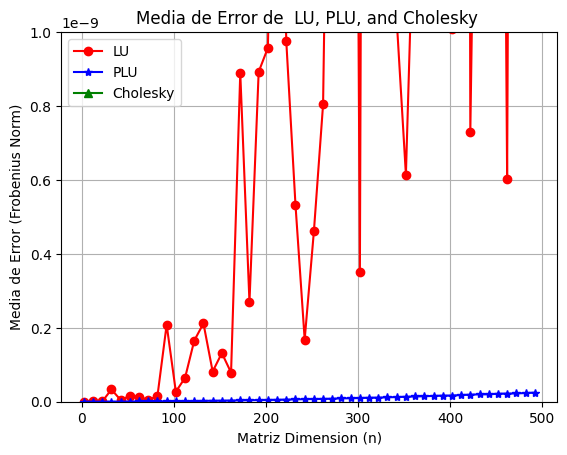

In [56]:
en = [] # x-axis data
error_LU = []
error_PLU = []
error_Cholesky = []

for i in range(2, 502, 10):
  en.append(i)
  A = 50 * np.random.rand(i, i)
  L, U = lu_factorization(A)
  error_LU.append(np.linalg.norm(A - L@U))

for n in range(2, 502, 10):
  A = 50 * np.random.rand(n, n)
  L, U, P = plu_factorization(A)
  error_PLU.append(np.linalg.norm((P@A) - (L@U)))

for n in range(2, 502, 10):
  A = 50 * np.random.rand(n, n)
  B = np.dot(A, A.T)
  U = cholesky_factorization(B)
  error_Cholesky.append(np.linalg.norm(B - np.dot(U, np.transpose(U))))

plt.plot(en, error_LU, label='LU', color='r', linestyle='-', marker='o')
plt.plot(en, error_PLU, label='PLU', color='b', linestyle='-', marker='*')
plt.plot(en, error_Cholesky, label='Cholesky', color='g', linestyle='-', marker='^')

plt.ylim([0.0, 1e-9])

plt.xlabel('Matriz Dimension (n)')
plt.ylabel('Media de Error (Frobenius Norm)')
plt.title('Media de Error de  LU, PLU, and Cholesky ')
plt.legend()
plt.grid(True)
plt.show()

### Promedio y desviacion de errores

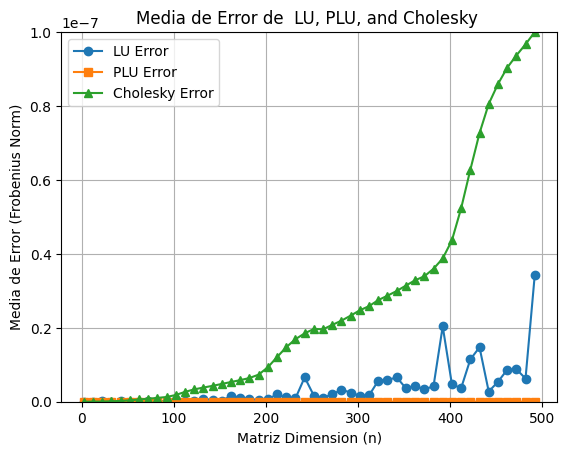

In [57]:
media_error_LU = []
media_error_PLU = []
media_error_Cholesky = []

std_error_LU = []
std_error_PLU = []
std_error_Cholesky = []

for n in range (2,502,10):
    es = []
    for i in range(25):
        A = 50 * np.random.rand(n, n)
        L, U = lu_factorization(A)
        error = np.linalg.norm(A - (L @ U))
        es.append(error)
    media_error_LU.append(np.mean(es))
    std_error_LU.append(np.std(es))

for n in range (2,502,10):
    es = []
    for i in range(25):
        A = 50 * np.random.rand(n, n)
        L, U,P = plu_factorization(A)
        error = np.linalg.norm((P@A) - (L @ U))
        es.append(error)
    media_error_PLU.append(np.mean(es))
    std_error_PLU.append(np.std(es))

for n in range (2,502,10):
    es = []
    for i in range(25):
        A = 50 * np.random.rand(n, n)
        B=A@A.T
        U = cholesky_factorization(B)
        error = np.linalg.norm(B - (U.T@U))
        es.append(error)
    media_error_Cholesky.append(np.mean(es))
    std_error_Cholesky.append(np.std(es))

plt.plot(en, media_error_LU, label="LU Error", marker='o')
plt.plot(en, media_error_PLU, label="PLU Error", marker='s')
plt.plot(en, media_error_Cholesky, label="Cholesky Error", marker='^')
plt.ylim([0.0, 1e-7])
plt.xlabel('Matriz Dimension (n)')
plt.ylabel('Media de Error (Frobenius Norm)')
plt.title('Media de Error de  LU, PLU, and Cholesky ')
plt.legend()
plt.grid(True)
plt.show()

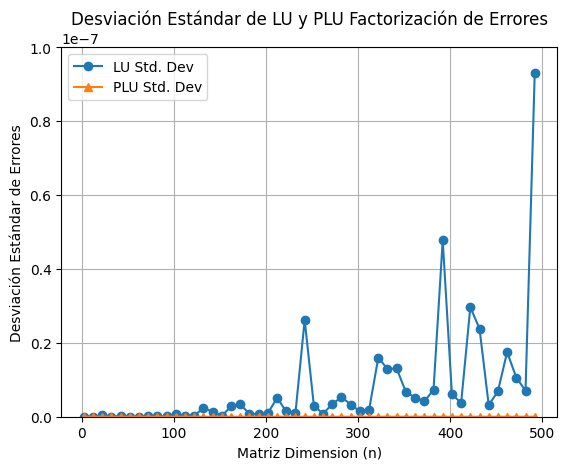

In [58]:
plt.plot(en, std_error_LU, label="LU Std. Dev", marker='o')
plt.plot(en, std_error_PLU, label="PLU Std. Dev", marker='^')
plt.ylim([0.0, 1e-7])
plt.xlabel('Matriz Dimension (n)')
plt.ylabel('Desviación Estándar de Errores')
plt.title('Desviación Estándar de LU y PLU Factorización de Errores')
plt.legend()
plt.grid(True)

f) Podemos ver que la desviacion de LU tiene valores mas altos , ya que conforme aumenta la dimension su variabilidad tambien. Mientras que PLU mantiene menos variabilidad lo que nos puede llegar a decir que es mas estable conforme aumnetan las dimensiones

In [59]:
media_error_LU = np.mean(media_error_LU)
media_error_PLU = np.mean(media_error_PLU)
media_error_Cholesky = np.mean(media_error_Cholesky)

print(f"Promedio de errores:")
print(f"LU: {media_error_LU}")
print(f"PLU: {media_error_PLU}")
print(f"Cholesky: {media_error_Cholesky}")

Promedio de errores:
LU: 3.729233447605121e-09
PLU: 8.792152167700366e-12
Cholesky: 2.6308924127272262e-08


g) El que presenta mas baja es PLU

In [60]:
desvia_LU = np.std(std_error_LU)
desvia_PLU = np.std(std_error_PLU)
desvia_Cholesky = np.std(std_error_Cholesky)

print(f"Promedio de desviación estándar:")
print(f"LU: {desvia_LU}")
print(f"PLU: {desvia_PLU}")
print(f"Cholesky: {desvia_Cholesky}")

Promedio de desviación estándar:
LU: 1.5207621283517155e-08
PLU: 1.0689670383690533e-13
Cholesky: 3.885183288145081e-10


h) El que menos tiene es PLU , pues su desviacion es menor

# Ejercicio 5

In [ ]:
media_error_LU_mod = []
desvia_LU_mod = []
media_error_PLU_mod = []
desvia_PLU_mod = []
e=1e-14
errors = []
for n in range (2,500,10):
  for i in range(25):
    A = 50 * np.random.rand(n, n)
    L, U = lu_factorization(A)
    error = np.linalg.norm(A - (L @ U))
    errors.append(error)
  media_error_LU_mod.append(np.mean(errors))
  desvia_LU_mod.append(np.std(errors))


for n in range (2,500,10):
    for i in range(25):
        A = 50 * np.random.rand(n, n)
        A[1, :] = A[0, :]
        A[1, 1] += e
        L, U,P = plu_factorization(A)
        error = np.linalg.norm((P@A) - (L @ U))
        errors.append(error)
    media_error_PLU_mod.append(np.mean(errors))
    desvia_PLU_mod.append(np.std(errors))

In [ ]:
plt.plot(en, media_error_LU_mod, label='LU', color='r', linestyle='-', marker='o')
plt.plot(en, media_error_PLU_mod, label='PLU', color='b', linestyle='-', marker='*')

plt.ylim([0.0, 1e-8])

plt.xlabel('Matriz de dimension N')
plt.ylabel('Media de error')
plt.title('Grafico media LU - PLU (con modificacion de renglones) ')
plt.legend()
plt.show()

In [ ]:
plt.plot(en, desvia_LU_mod, label='LU', color='r', linestyle='-', marker='o')
plt.plot(en, desvia_PLU_mod, label='PLU', color='b', linestyle='-', marker='*')

plt.ylim([0.0, 1e-8])

plt.xlabel('Matriz de dimension N')
plt.ylabel('Desviacion estandar de error')
plt.title('Grafico desviacion LU - PLU (con modificacion de renglones) ')
plt.legend()
plt.show()